In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('titanic.csv')

In [6]:
survived_counts = df['survived'].value_counts()
print('Survived counts:')
print(survived_counts)

Survived counts:
0    549
1    342
Name: survived, dtype: int64


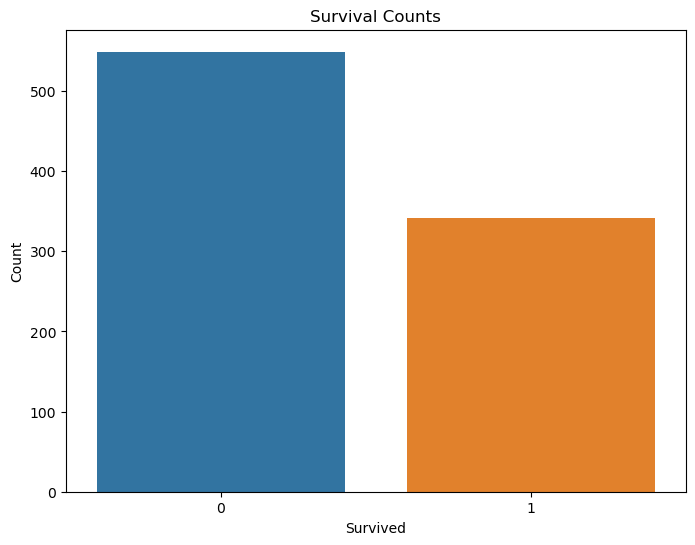

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df)
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [8]:
pclass_counts = df['pclass'].value_counts()
print('Passenger Class counts:')
print(pclass_counts)

Passenger Class counts:
3    491
1    216
2    184
Name: pclass, dtype: int64


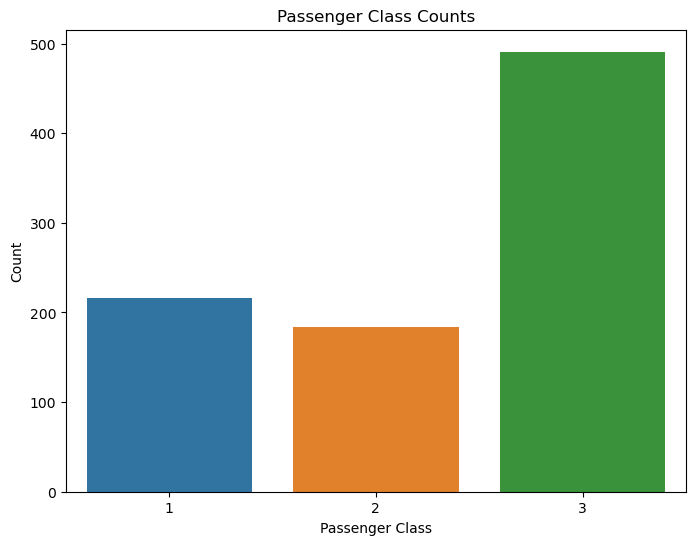

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Counts')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [10]:
sex_counts = df['sex'].value_counts()
print('Sex counts:')
print(sex_counts)

Sex counts:
male      577
female    314
Name: sex, dtype: int64


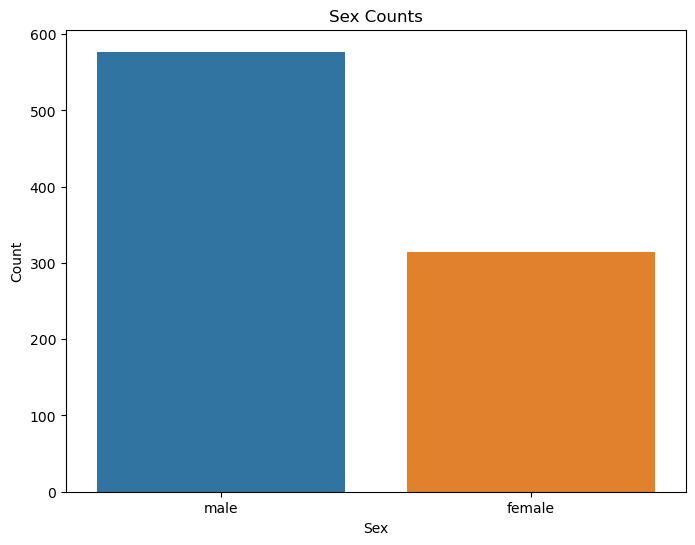

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Sex Counts')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

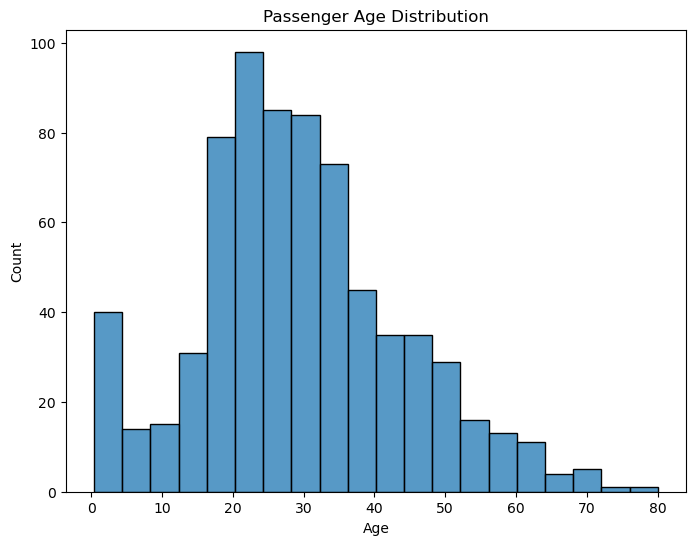

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'].dropna(), bins=20)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

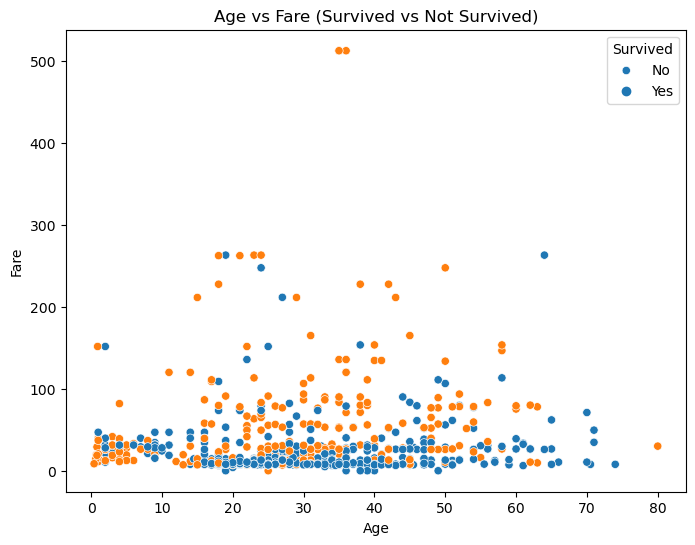

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', data=df, hue='survived')
plt.title('Age vs Fare (Survived vs Not Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

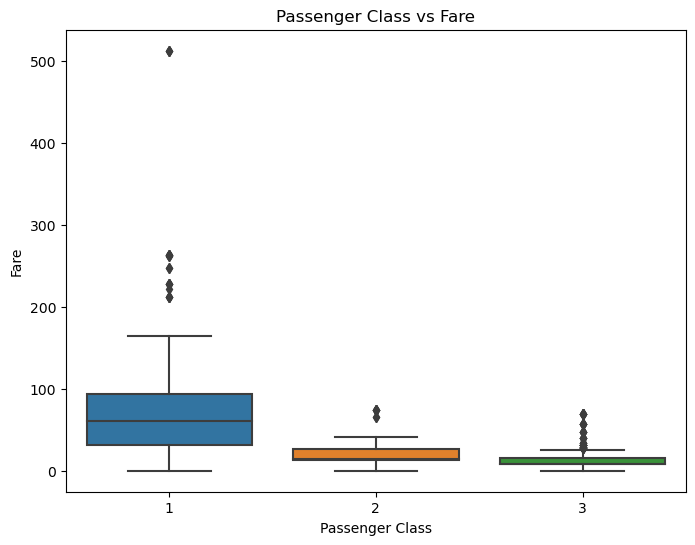

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Passenger Class vs Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

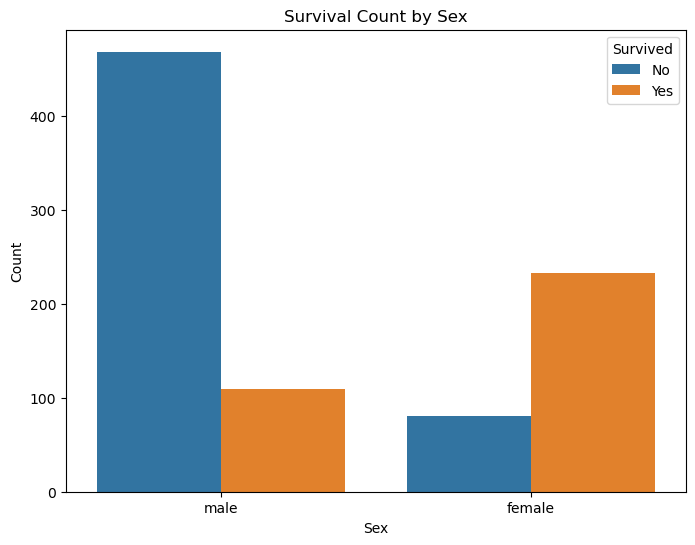

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

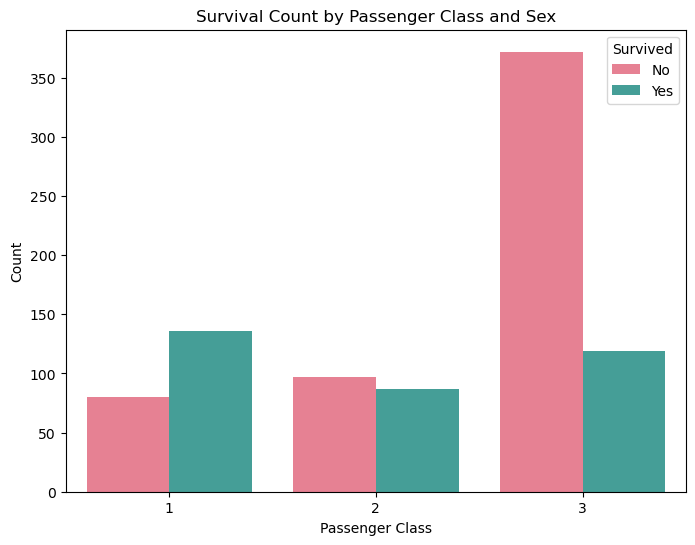

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df, palette='husl')
plt.title('Survival Count by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

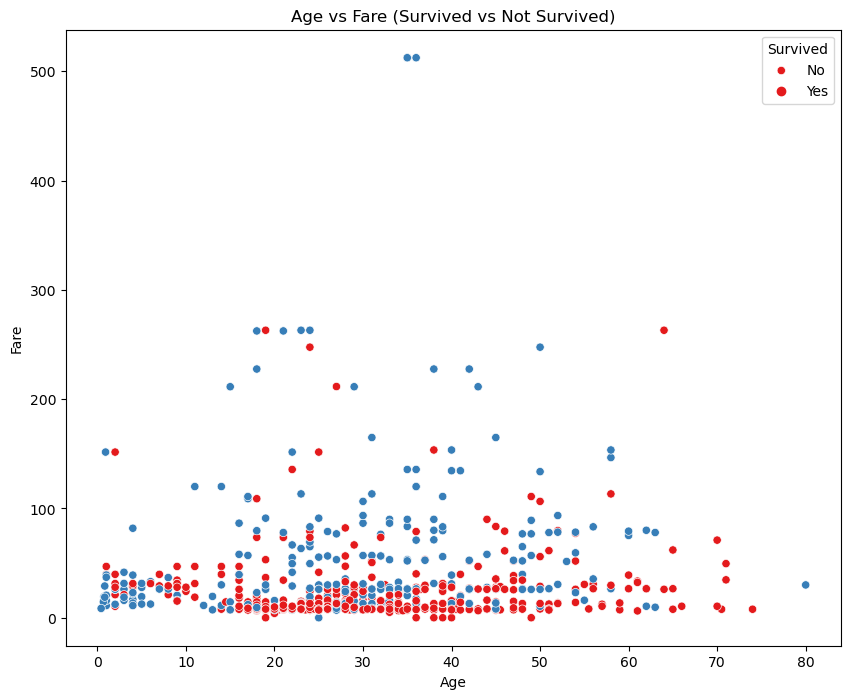

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, palette='Set1')
plt.title('Age vs Fare (Survived vs Not Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

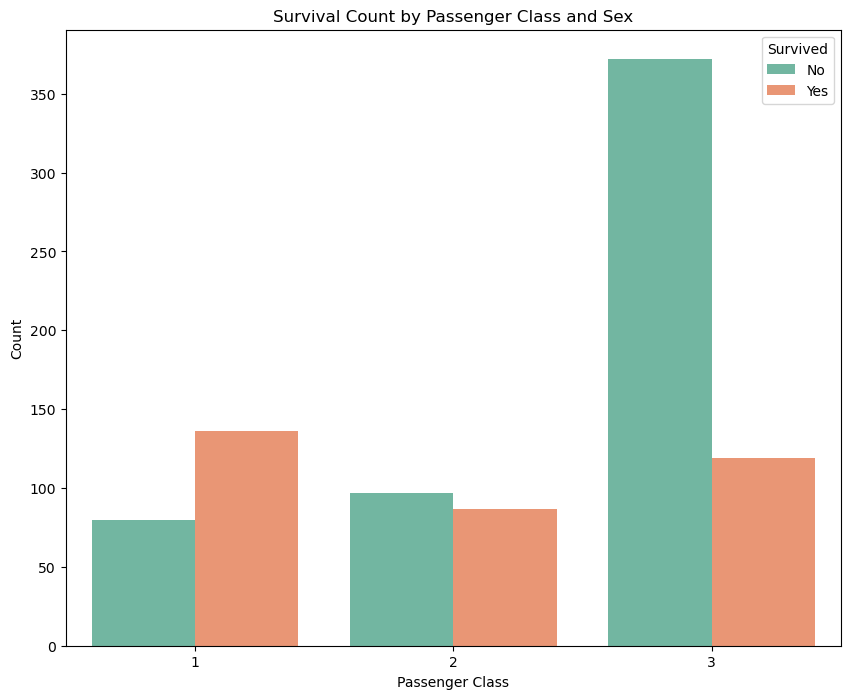

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(x='pclass', hue='survived', data=df, palette='Set2', hue_order=[0, 1])
plt.title('Survival Count by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

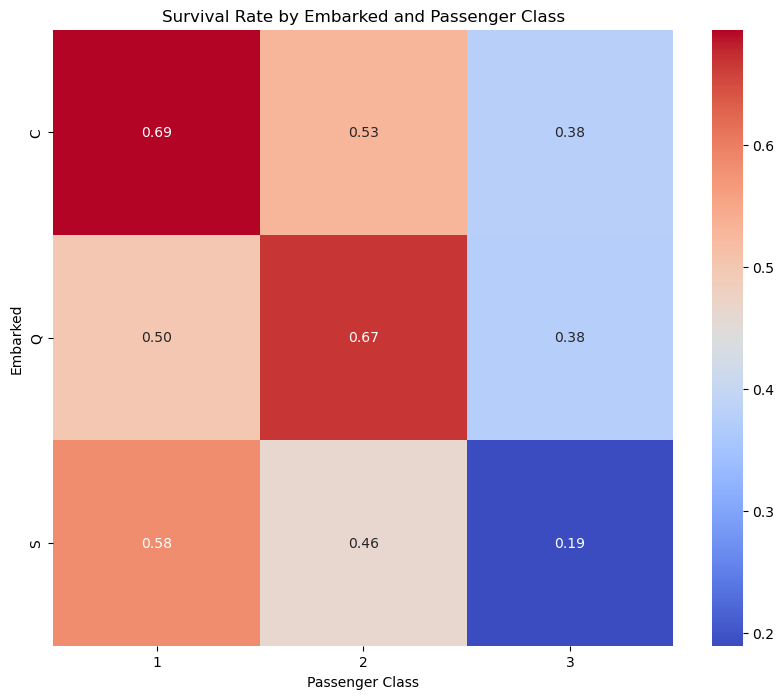

In [19]:
pivot_table = df.pivot_table(index='embarked', columns='pclass', values='survived', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Survival Rate by Embarked and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Embarked')
plt.show()

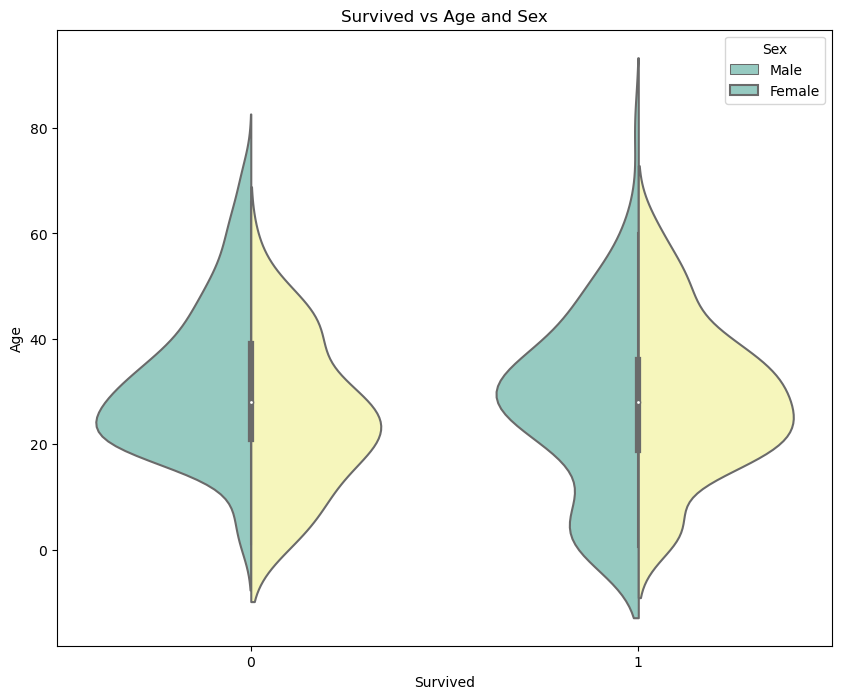

In [20]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='survived', y='age', hue='sex', data=df, palette='Set3', split=True)
plt.title('Survived vs Age and Sex')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

In [21]:
df = pd.read_csv('titanic.csv')

descriptive_stats = df.describe()
print(descriptive_stats)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [22]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [23]:
missing_ratio = missing_values / len(df)
high_missing_cols = missing_ratio[missing_ratio > 0.5].index
df = df.drop(columns=high_missing_cols)
print("Columns dropped due to high missing value ratio:")
print(high_missing_cols)

Columns dropped due to high missing value ratio:
Index(['deck'], dtype='object')


In [24]:
columns_with_missing = ['age', 'embarked']
df = df.dropna(subset=columns_with_missing)
print("Rows dropped with missing values in columns:", columns_with_missing)

Rows dropped with missing values in columns: ['age', 'embarked']


In [25]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [26]:
missing_values_after = df.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_after)

Missing Values After Handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [27]:
numeric_cols = ['age', 'fare']

In [28]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [29]:
threshold = 1.5

In [30]:
outlier_indices = ((df[numeric_cols] < (Q1 - threshold * IQR)) | (df[numeric_cols] > (Q3 + threshold * IQR))).any(axis=1)

In [31]:
for col in numeric_cols:
    median = df[col].median()
    df.loc[outlier_indices, col] = median

In [32]:
replaced_values = df[outlier_indices][numeric_cols]
print("Replaced Outlier Values:")
print(replaced_values)

Replaced Outlier Values:
      age      fare
1    28.0  15.64585
27   28.0  15.64585
33   28.0  15.64585
34   28.0  15.64585
52   28.0  15.64585
..    ...       ...
820  28.0  15.64585
835  28.0  15.64585
851  28.0  15.64585
856  28.0  15.64585
879  28.0  15.64585

[102 rows x 2 columns]


In [33]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')


In [34]:
for col in categorical_cols:
    if len(df[col].unique()) == 2:
        df[col] = df[col].astype('category').cat.codes
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [35]:
print("Encoded DataFrame:")
print(df.head())

Encoded DataFrame:
   survived  pclass  sex   age  sibsp  parch      fare  adult_male  alive  \
0         0       3    1  22.0      1      0   7.25000        True      0   
1         1       1    0  28.0      1      0  15.64585       False      1   
2         1       3    0  26.0      0      0   7.92500       False      1   
3         1       1    0  35.0      1      0  53.10000       False      1   
4         0       3    1  35.0      0      0   8.05000        True      0   

   alone  embarked_Q  embarked_S  class_Second  class_Third  who_man  \
0  False           0           1             0            1        1   
1  False           0           0             0            0        0   
2   True           0           1             0            1        0   
3  False           0           1             0            0        0   
4   True           0           1             0            1        1   

   who_woman  embark_town_Queenstown  embark_town_Southampton  
0          0         

In [36]:
X = df.drop('survived', axis=1)  # Independent variables (all columns except 'survived')
y = df['survived']  # Dependent variable

In [37]:
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
   pclass  sex   age  sibsp  parch      fare  adult_male  alive  alone  \
0       3    1  22.0      1      0   7.25000        True      0  False   
1       1    0  28.0      1      0  15.64585       False      1  False   
2       3    0  26.0      0      0   7.92500       False      1   True   
3       1    0  35.0      1      0  53.10000       False      1  False   
4       3    1  35.0      0      0   8.05000        True      0   True   

   embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  \
0           0           1             0            1        1          0   
1           0           0             0            0        0          1   
2           0           1             0            1        0          1   
3           0           1             0            0        0          1   
4           0           1             0            1        1          0   

   embark_town_Queenstown  embark_town_Southampton  
0                 

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [41]:
X = df.drop('survived', axis=1)

In [42]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [44]:
print("Scaled Independent Variables:")
print(X_scaled_df.head())

Scaled Independent Variables:
     pclass       sex       age     sibsp     parch      fare  adult_male  \
0  0.908600  0.756138 -0.504594  0.522511 -0.506787 -0.850611    0.850865   
1 -1.482983 -1.322511 -0.029027  0.522511 -0.506787 -0.216809   -1.175275   
2  0.908600 -1.322511 -0.187549 -0.552714 -0.506787 -0.799655   -1.175275   
3 -1.482983 -1.322511  0.525801  0.522511 -0.506787  2.610599   -1.175275   
4  0.908600  0.756138  0.525801 -0.552714 -0.506787 -0.790219    0.850865   

      alive     alone  embarked_Q  embarked_S  class_Second  class_Third  \
0 -0.824163 -1.138760   -0.202326    0.534040     -0.566538     1.002813   
1  1.213352 -1.138760   -0.202326   -1.872519     -0.566538    -0.997195   
2  1.213352  0.878148   -0.202326    0.534040     -0.566538     1.002813   
3  1.213352 -1.138760   -0.202326    0.534040     -0.566538    -0.997195   
4 -0.824163  0.878148   -0.202326    0.534040     -0.566538     1.002813   

    who_man  who_woman  embark_town_Queenstown  em

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('survived', axis=1)
y = df['survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (569, 17) (569,)
Testing set shape: (143, 17) (143,)
